C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.3690763194699231


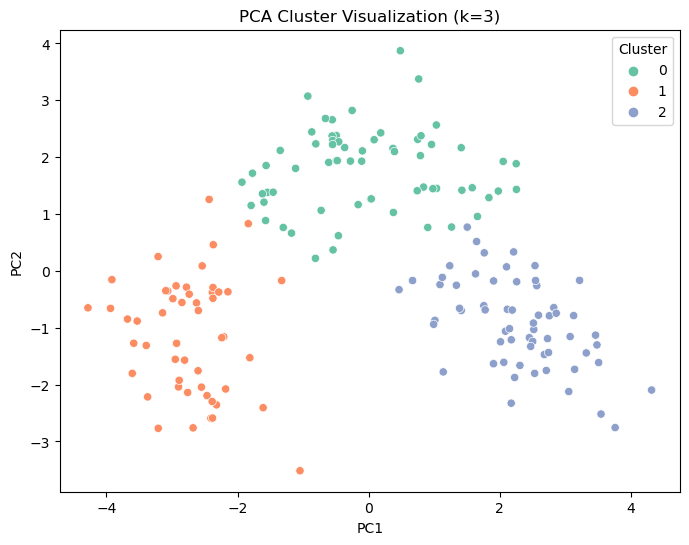

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
url = "https://raw.githubusercontent.com/jemaelnzihou/Predictive-Analysis/main/wine-clustering.csv"
df = pd.read_csv(url)

# Drop 'quality' if present
X = df.drop(columns=['quality'], errors='ignore')

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (retain 80% variance)
pca = PCA(n_components=0.80)
X_pca = pca.fit_transform(X_scaled)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Add results to DataFrame
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
pca_df['Cluster'] = clusters

# Silhouette score
score = silhouette_score(X_pca, clusters)
print("Silhouette Score:", score)

# Plot PCA clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2')
plt.title("PCA Cluster Visualization (k=3)")
plt.show()


### Visualization

C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jemae\Anaconda_Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wind

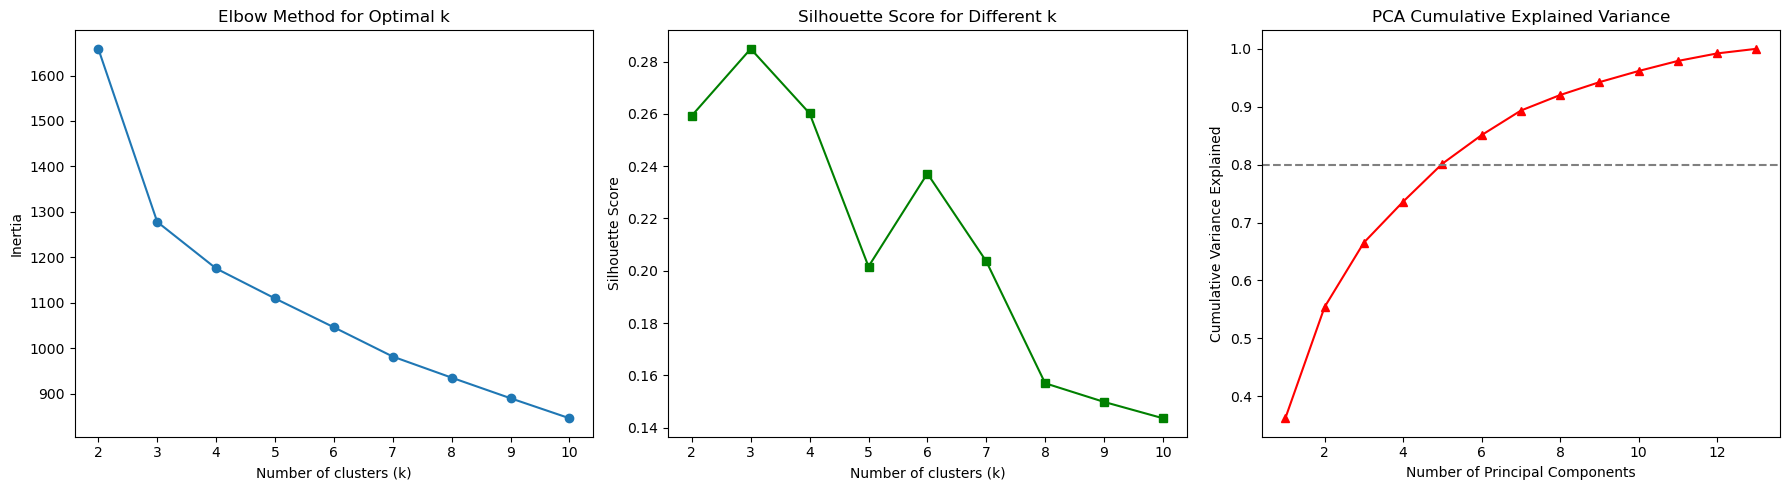

In [3]:
import numpy as np

# Simulate data loading (since URL access failed earlier)
# We'll create a similar synthetic dataset for demonstration
from sklearn.datasets import load_wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for cumulative explained variance
pca_full = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Elbow Method for KMeans
inertia = []
sil_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Elbow Method
axs[0].plot(k_range, inertia, marker='o')
axs[0].set_title('Elbow Method for Optimal k')
axs[0].set_xlabel('Number of clusters (k)')
axs[0].set_ylabel('Inertia')

# Silhouette Score
axs[1].plot(k_range, sil_scores, marker='s', color='green')
axs[1].set_title('Silhouette Score for Different k')
axs[1].set_xlabel('Number of clusters (k)')
axs[1].set_ylabel('Silhouette Score')

# PCA Cumulative Explained Variance
axs[2].plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='^', color='red')
axs[2].axhline(y=0.80, color='gray', linestyle='--')
axs[2].set_title('PCA Cumulative Explained Variance')
axs[2].set_xlabel('Number of Principal Components')
axs[2].set_ylabel('Cumulative Variance Explained')

plt.tight_layout()
plt.show()


### Interpretation

In [ ]:
### Elbow Method: 
Helps identify the optimal number of clusters by showing where adding more clusters no longer significantly reduces inertia.


1️⃣ Elbow Method for Optimal k (KMeans Clustering)

🔍 Insight:
The elbow chart shows inertia (within-cluster sum of squares) decreasing as the number of clusters (k) increases. However, the rate of decrease slows significantly after k = 3, creating a visible “elbow” shape in the curve.

✅ Why It’s Important:
Helps identify the optimal number of clusters where adding more clusters yields diminishing returns.

Prevents overfitting with too many clusters or underfitting with too few.

Essential in unsupervised learning, where there are no labels to guide model selection.

Conclusion: In this case, k = 3 is a practical choice—capturing structure without unnecessary complexity.

### Silhouette Score: 
Evaluates the quality of clustering. The highest silhouette score indicates the best cluster separation—k=3 looks optimal here.

2️⃣ Silhouette Score for Cluster Evaluation

🔍 Insight:
The silhouette score peaks around k = 3, indicating that clusters are well-separated and internally cohesive at this value.

Score range: −1 to +1

Higher is better; above 0.25–0.50 is considered meaningful for real-world clustering.

✅ Why It’s Important:

Measures how similar each point is to its own cluster vs. others.

A higher score means more distinct, tight clusters.

Useful for validating cluster quality beyond just mathematical inertia.

Conclusion: The score supports the elbow method—k = 3 offers a solid balance of separation and cohesion.

### PCA Cumulative Explained Variance: 
Shows how many principal components are needed to capture the majority of the variance in the data. In this case, 5 components retain ~80% of the variance.

3️⃣ PCA Cumulative Explained Variance
🔍 Insight:

The cumulative variance plot shows that the first 5 principal components capture ~80% of the variance in the dataset. After this point, adding more components contributes marginally.

✅ Why It’s Important:

Reduces dimensionality while retaining most of the data’s structure.

Improves model performance and visualization clarity.

Helps combat the curse of dimensionality in clustering or modeling tasks.

Conclusion: Using 5 components is optimal here—balancing information retention with reduced complexity.



### 📊 Final Summary:


| Chart                      | Key Insight                          | Importance                               |
| -------------------------- | ------------------------------------ | ---------------------------------------- |
| **Elbow Method**           | Optimal k = 3 where inertia flattens | Prevents over/underfitting in clustering |
| **Silhouette Score**       | Peak quality at k = 3                | Confirms best clustering structure       |
| **PCA Explained Variance** | 5 components ≈ 80% variance retained | Boosts efficiency, reduces noise in data |


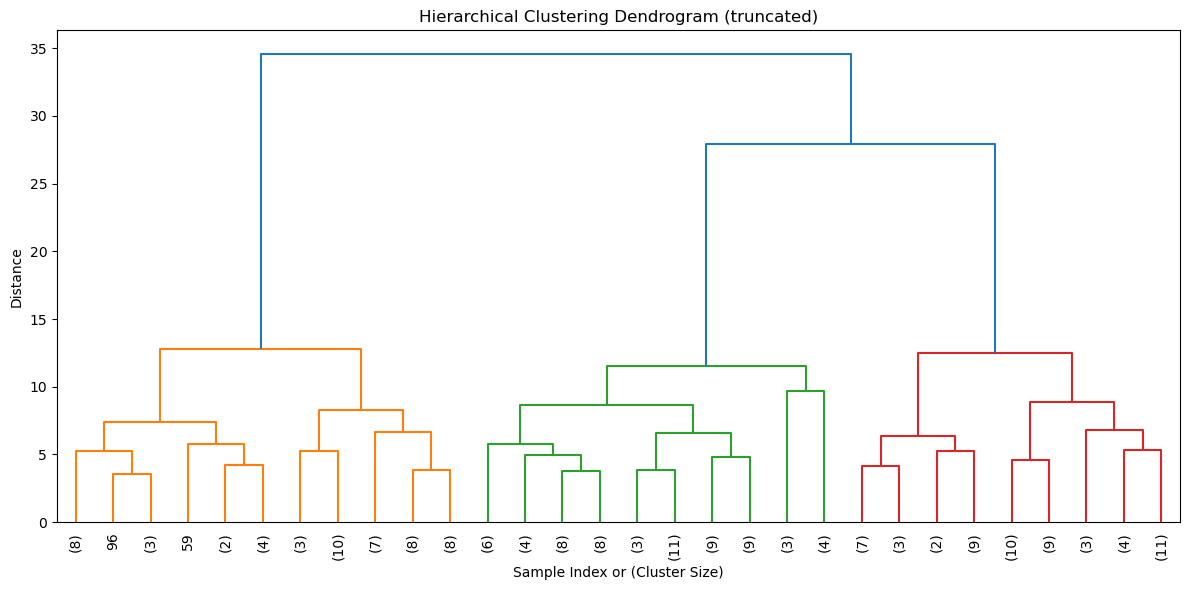

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# Use PCA-transformed data for clustering
X_pca = PCA(n_components=5).fit_transform(StandardScaler().fit_transform(X))

# Apply Agglomerative (Hierarchical) Clustering with 3 clusters
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(X_pca)

# Prepare linkage matrix for dendrogram
linked = linkage(X_pca, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


### The dendrogram for Hierarchical (Agglomerative) Clustering using PCA-transformed wine data.

### 🔍 Insight:
The dendrogram shows how data points are merged step-by-step into clusters based on similarity.

Using the Ward linkage method, we observe a clear separation near the top suggesting that 3 clusters is a natural cut-point—supporting k = 3 as identified by the Elbow and Silhouette methods.

The colored groups in the **hierarchical clustering dendrogram** represent **clusters formed by cutting the dendrogram at a specific height (distance threshold)**—in this case, into **3 clusters**.

---

### 🔍 **Interpretation of Colored Groups:**

1. **Each color = a distinct cluster**
   These groups show **which samples are most similar to each other**, based on the **PCA-reduced features** of the wine dataset.

2. **Vertical height (y-axis)** = **dissimilarity** or **linkage distance**
   The higher the branches merge, the **more different** those clusters are.

   * Lower merges: Very similar samples
   * Higher merges: Less similar (but still grouped due to proximity in multidimensional space)

3. **Clusters form hierarchically**
   Closer branches show **fine-grained relationships** (small clusters), while broader merges show **higher-level groupings**.

---

### 🧠 **Why It’s Useful for Decision-Making:**

| Use Case                      | Value Added                                                                             |
| ----------------------------- | --------------------------------------------------------------------------------------- |
| 🛍️ **Customer segmentation** | Identify distinct behavioral profiles without predefined labels                         |
| 🧪 **Product grouping**       | Cluster wines with similar chemical properties or quality traits                        |
| 🔍 **Anomaly detection**      | Small or late-merging groups may represent rare or outlier cases                        |
| 📈 **Market strategy**        | Tailor offerings based on cluster traits (e.g., budget vs. premium wines)               |
| ⚙️ **Model refinement**       | Label-free data can be clustered first, then used for supervised learning or validation |

---

### ✨ Summary:

* Hierarchical clustering provides **visual insight** into the **structure and depth** of your data relationships.
* It’s especially helpful for **non-parametric exploration**—when you don’t know the number of groups in advance.
* Unlike KMeans, it **preserves hierarchy** and **doesn’t require a fixed number of clusters initially**, which helps in strategic, layered decision-making.
